<a href="https://colab.research.google.com/github/wenko99/Standalone_DDL/blob/master/Lec05/Lec05_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [0]:
cifar10 = tf.keras.datasets.cifar10
(data, labels), (test_data, test_labels) = cifar10.load_data()

In [0]:
num_classes = 10
labels = tf.keras.utils.to_categorical(labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

data = data.astype('float64')
test_data = test_data.astype('float64')
data /= 255.0
test_data /= 255.0

In [0]:
train_data = data[:40000]
train_labels = labels[:40000]
val_data = data[40000:]
val_labels = labels[40000:]

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                163850    
Total params: 164,682
Trainable params: 164,682
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_data=(val_data, val_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 16s 400us/sample - loss: 1.8556 - acc: 0.3244 - val_loss: 1.7125 - val_acc: 0.3814
Epoch 2/5
40000/40000 [==============================] - 13s 331us/sample - loss: 1.6674 - acc: 0.4017 - val_loss: 1.6451 - val_acc: 0.4126
Epoch 3/5
40000/40000 [==============================] - 13s 330us/sample - loss: 1.6251 - acc: 0.4162 - val_loss: 1.6241 - val_acc: 0.4190
Epoch 4/5
40000/40000 [==============================] - 13s 331us/sample - loss: 1.6078 - acc: 0.4232 - val_loss: 1.6058 - val_acc: 0.4318
Epoch 5/5
40000/40000 [==============================] - 13s 331us/sample - loss: 1.5857 - acc: 0.4294 - val_loss: 1.6082 - val_acc: 0.4284


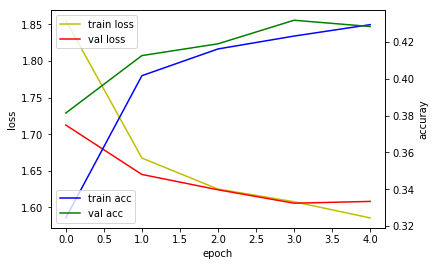

In [0]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()